# Exercise

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
df = pd.read_csv(r'train.csv', low_memory=False, parse_dates=['Date'])
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [16]:
store_day = df.groupby(by=['Store','DayOfWeek'], as_index=False).mean(numeric_only=True)
store_day.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
0,1,1,4946.119403,567.768657,0.955224,0.537313,0.223881
1,1,2,4650.918519,545.370370,0.992593,0.533333,0.229630
2,1,3,4454.474074,530.407407,0.977778,0.533333,0.229630
3,1,4,4094.607407,493.407407,0.918519,0.533333,0.222222
4,1,5,4516.414815,537.259259,0.955556,0.533333,0.229630


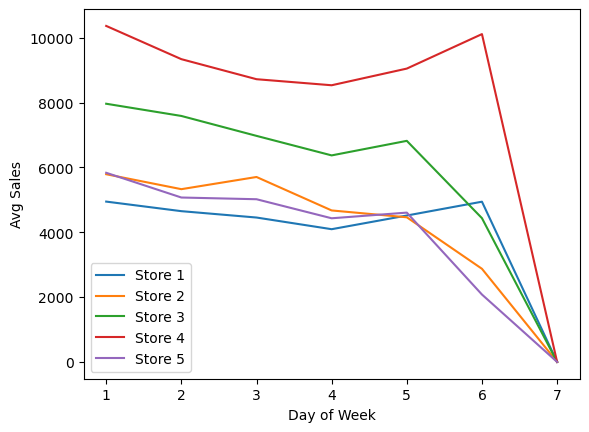

In [23]:
for store in df.Store.unique()[:5]:
    df_tmp = store_day[store_day.Store == store]
    plt.plot(df_tmp.DayOfWeek, df_tmp.Sales, label=f"Store {store}")
    plt.xlabel('Day of Week')
    plt.ylabel('Avg Sales')
    plt.legend();

In [29]:
df.Sales.describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [31]:
bins = [0, 2000, 4000, 6000, 8000, 10000, 50000]
cuts = pd.cut(df.Sales, bins, include_lowest=True)
df['SalesGroup'] = cuts

In [32]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesGroup
0,1,5,2015-07-31,5263,555,1,1,0,1,"(4000.0, 6000.0]"
1,2,5,2015-07-31,6064,625,1,1,0,1,"(6000.0, 8000.0]"
2,3,5,2015-07-31,8314,821,1,1,0,1,"(8000.0, 10000.0]"
3,4,5,2015-07-31,13995,1498,1,1,0,1,"(10000.0, 50000.0]"
4,5,5,2015-07-31,4822,559,1,1,0,1,"(4000.0, 6000.0]"


In [38]:
df.groupby(by=['Store', 'SalesGroup'], observed=True).DayOfWeek.value_counts()

Store  SalesGroup          DayOfWeek
1      (-0.001, 2000.0]    7            134
                           4             11
                           1              6
                           5              6
                           3              3
                                       ... 
1115   (10000.0, 50000.0]  5              7
                           2              2
                           4              2
                           6              2
                           3              1
Name: count, Length: 33024, dtype: int64

In [40]:
df.groupby(by=['Store', 'SalesGroup'], observed=True).DayOfWeek.value_counts().unstack(fill_value=0)

DayOfWeek                  1   2   3   4   5    6    7
Store SalesGroup                                      
1     (-0.001, 2000.0]     6   1   3  11   6    0  134
      (2000.0, 4000.0]    28  42  42  43  28   13    0
      (4000.0, 6000.0]    70  80  83  72  91  109    0
      (6000.0, 8000.0]    26  12   7   9   9   10    0
      (8000.0, 10000.0]    4   0   0   0   1    2    0
...                       ..  ..  ..  ..  ..  ...  ...
1115  (2000.0, 4000.0]    15  17  15   9   0    0    0
      (4000.0, 6000.0]    34  54  65  64  61   36    0
      (6000.0, 8000.0]    30  52  39  39  50   80    0
      (8000.0, 10000.0]   37   9  12  10  11   16    0
      (10000.0, 50000.0]  12   2   1   2   7    2    0

[6263 rows x 7 columns]

In [44]:
df.groupby(by=['Store', 'SalesGroup', 'DayOfWeek'], observed=True).Sales.count().unstack()

DayOfWeek                    1     2     3     4     5      6      7
Store SalesGroup                                                    
1     (-0.001, 2000.0]     6.0   1.0   3.0  11.0   6.0    NaN  134.0
      (2000.0, 4000.0]    28.0  42.0  42.0  43.0  28.0   13.0    NaN
      (4000.0, 6000.0]    70.0  80.0  83.0  72.0  91.0  109.0    NaN
      (6000.0, 8000.0]    26.0  12.0   7.0   9.0   9.0   10.0    NaN
      (8000.0, 10000.0]    4.0   NaN   NaN   NaN   1.0    2.0    NaN
...                        ...   ...   ...   ...   ...    ...    ...
1115  (2000.0, 4000.0]    15.0  17.0  15.0   9.0   NaN    NaN    NaN
      (4000.0, 6000.0]    34.0  54.0  65.0  64.0  61.0   36.0    NaN
      (6000.0, 8000.0]    30.0  52.0  39.0  39.0  50.0   80.0    NaN
      (8000.0, 10000.0]   37.0   9.0  12.0  10.0  11.0   16.0    NaN
      (10000.0, 50000.0]  12.0   2.0   1.0   2.0   7.0    2.0    NaN

[6263 rows x 7 columns]

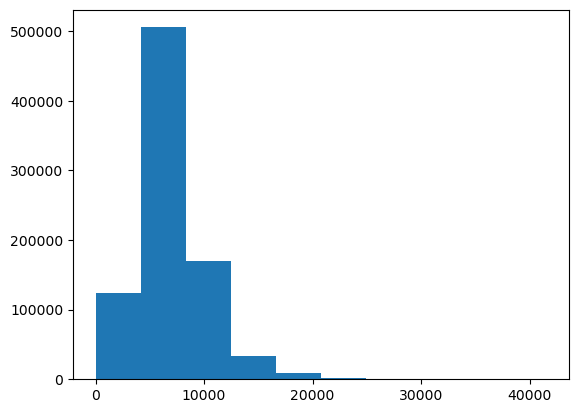

In [9]:
df = df[df.Open == 1].copy()
plt.hist(df.Sales);

In [ ]:
np.random.choice()